In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [7]:
# Import the log file
df = pd.read_csv("log4.csv")
# LabelEncoder for the diffMethod
#enc = LabelEncoder()
#enc.fit(df["diffMethod"])
#df["diffMethod"] = enc.transform(df["diffMethod"])
# Add the f1_score
df["f1_score"] = 1/(1/df["percentHeliTotalFiltered"]+1/df["percentFrameWithHeli"])

# Display
df.tail()

,gaussWindow,mgp,minArea,residualConnections,winSize,maxLevel,diffMethod,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
0,5,125,1,1,3,7,0,145.871703,1.161943,1.147099,0.045884,0.04,0.041723,0.020422
1,5,125,1,2,3,7,0,130.937869,1.590541,1.506757,0.000000,0.00,0.000000,0.000000
2,5,125,1,3,3,7,0,110.304521,10.031123,9.408660,0.000000,0.00,0.000000,0.000000
3,5,125,1,4,3,7,0,108.813880,12.895664,11.780488,0.000000,0.00,0.000000,0.000000


[0, 1, 0, 1]

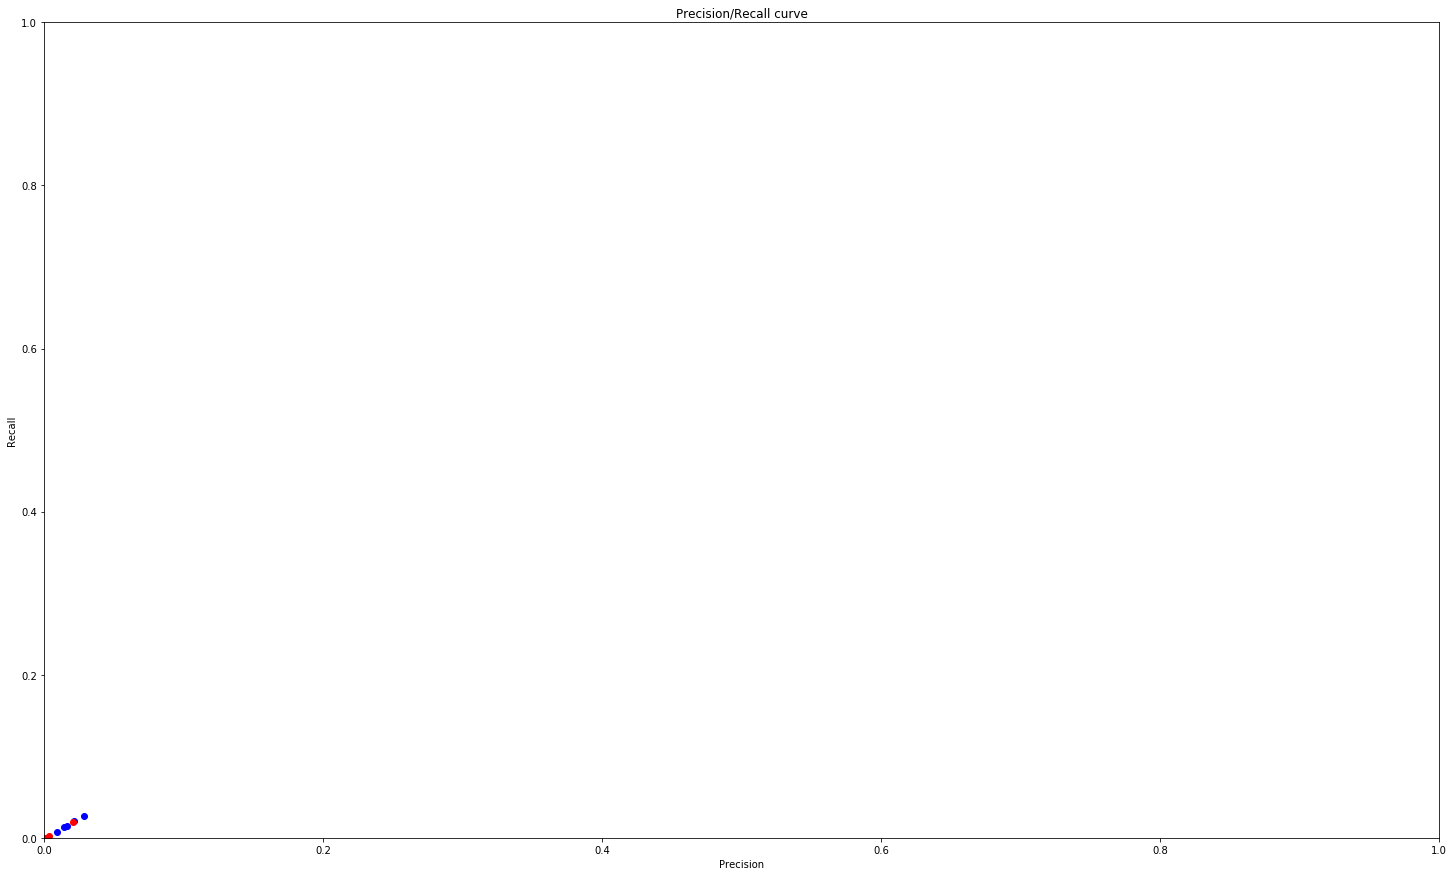

In [6]:
nSim = len(df)-5 # Show where the last 10 values have been found
plt.figure(figsize=(25, 15))
plt.scatter(df["percentHeliTotalFiltered"][:nSim], df["percentFrameWithHeli"][:nSim], c='blue')
plt.scatter(df["percentHeliTotalFiltered"][nSim:], df["percentFrameWithHeli"][nSim:], c='red')
plt.title("Precision/Recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.axis([0, 1, 0, 1])

In [49]:
def plotParam(param, paramRange):
    plt.figure(figsize=(25, 15))
    cmap = matplotlib.cm.get_cmap("jet")
    for index, value in enumerate(paramRange):
        #plt.figure(figsize=(25, 15))
        indexes = (df[param] == value)
        prec = df["percentHeliTotalFiltered"][indexes]
        recall = df["percentFrameWithHeli"][indexes]
        plt.scatter(prec, recall, c=cmap(value/max(paramRange)))
        xcText, ycText = np.mean(prec), np.mean(recall)
        plt.text(xcText, ycText, str(value), color=cmap(value/max(paramRange)), fontdict={"weight": "bold", "size": 30})
        plt.title(param+" impact", fontdict={"weight": "bold", "size": 30})
        plt.xlabel("Precision", fontdict={"weight": "bold", "size": 20})
        plt.ylabel("Recall", fontdict={"weight": "bold", "size": 20})
        plt.axis([0, 1, 0, 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

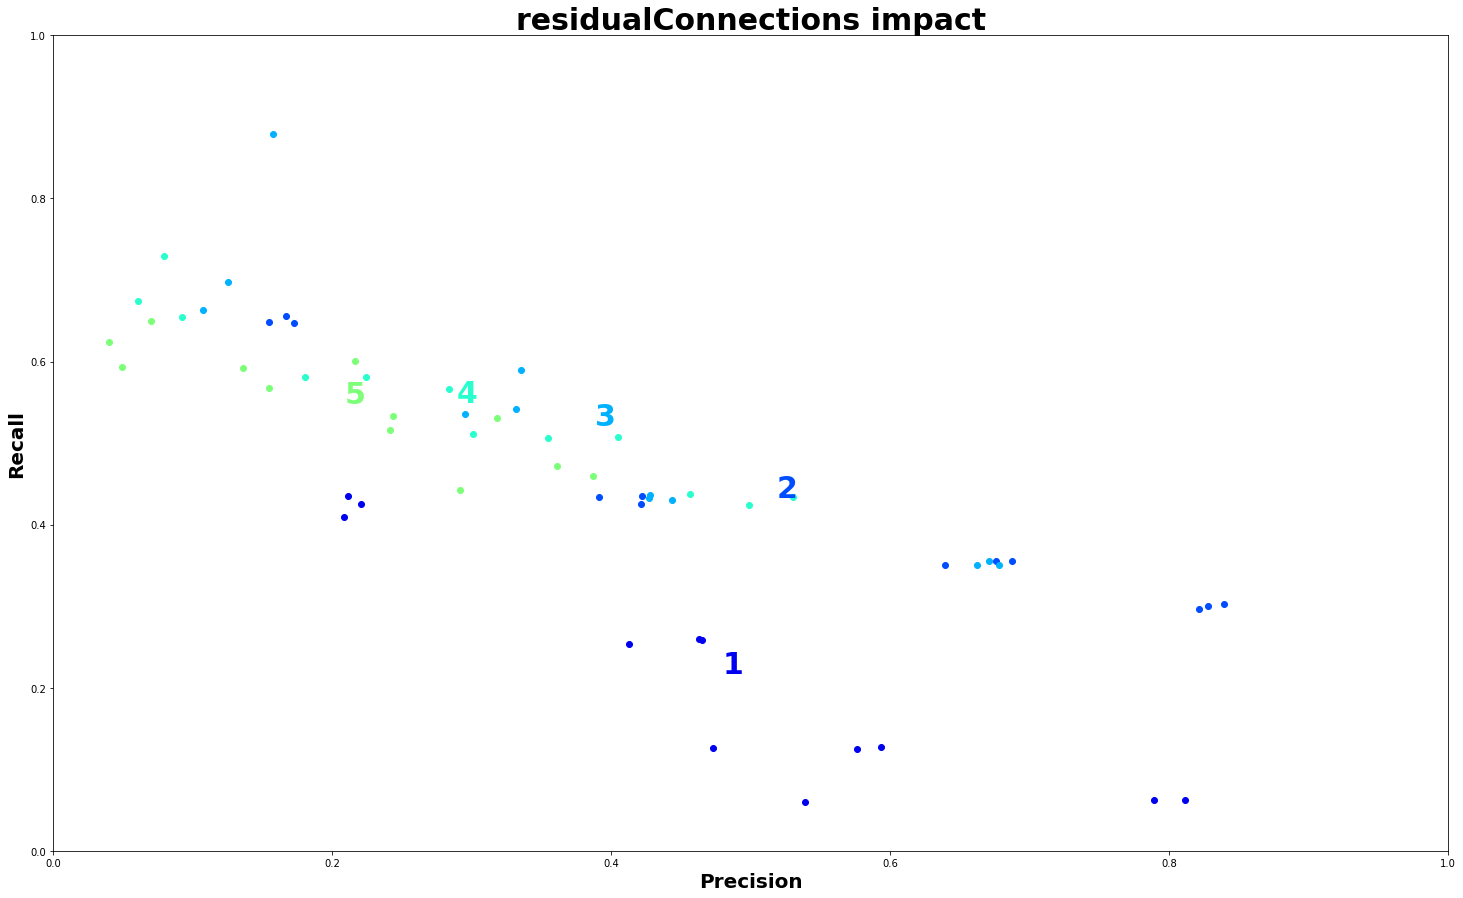

In [50]:
param = ["residualConnections"]
paramRange = [range(1, 11)]
for i in range(len(param)):
    plotParam(param[i], paramRange[i])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

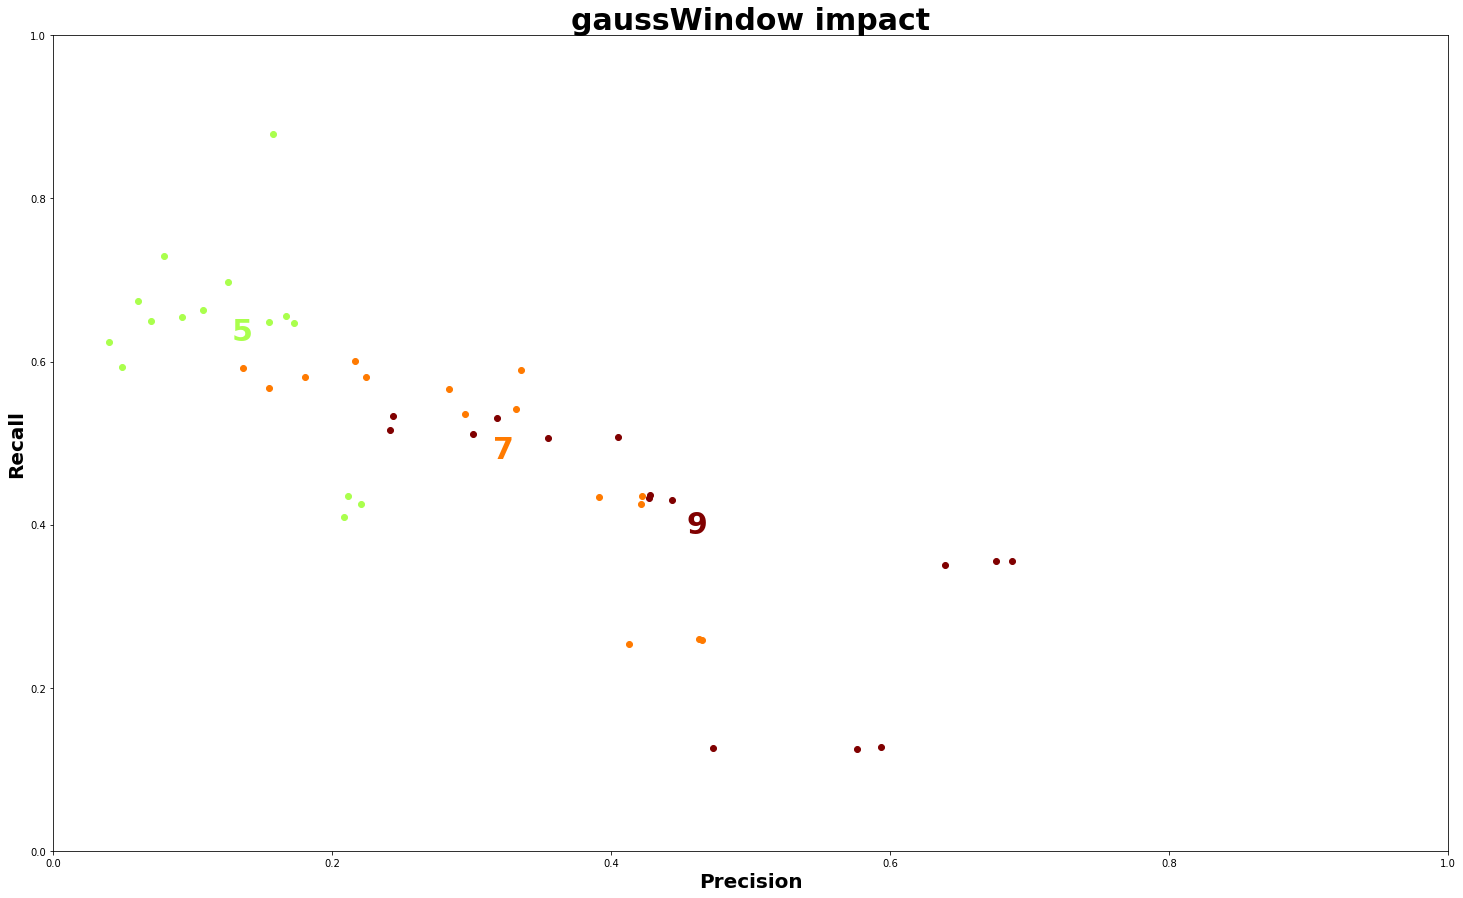

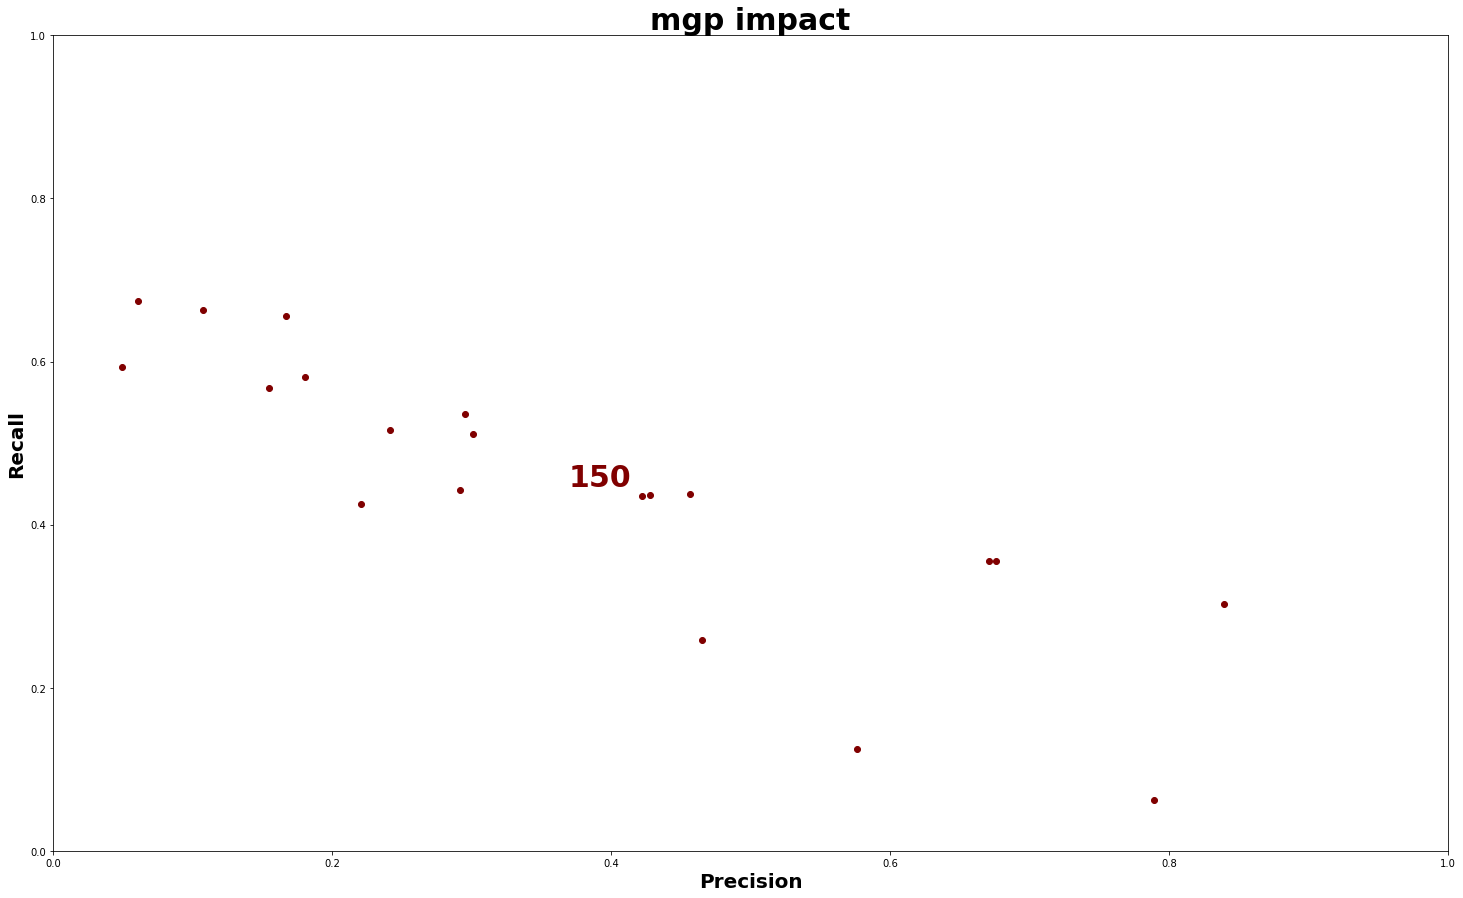

posx and posy should be finite values
posx and posy should be finite values


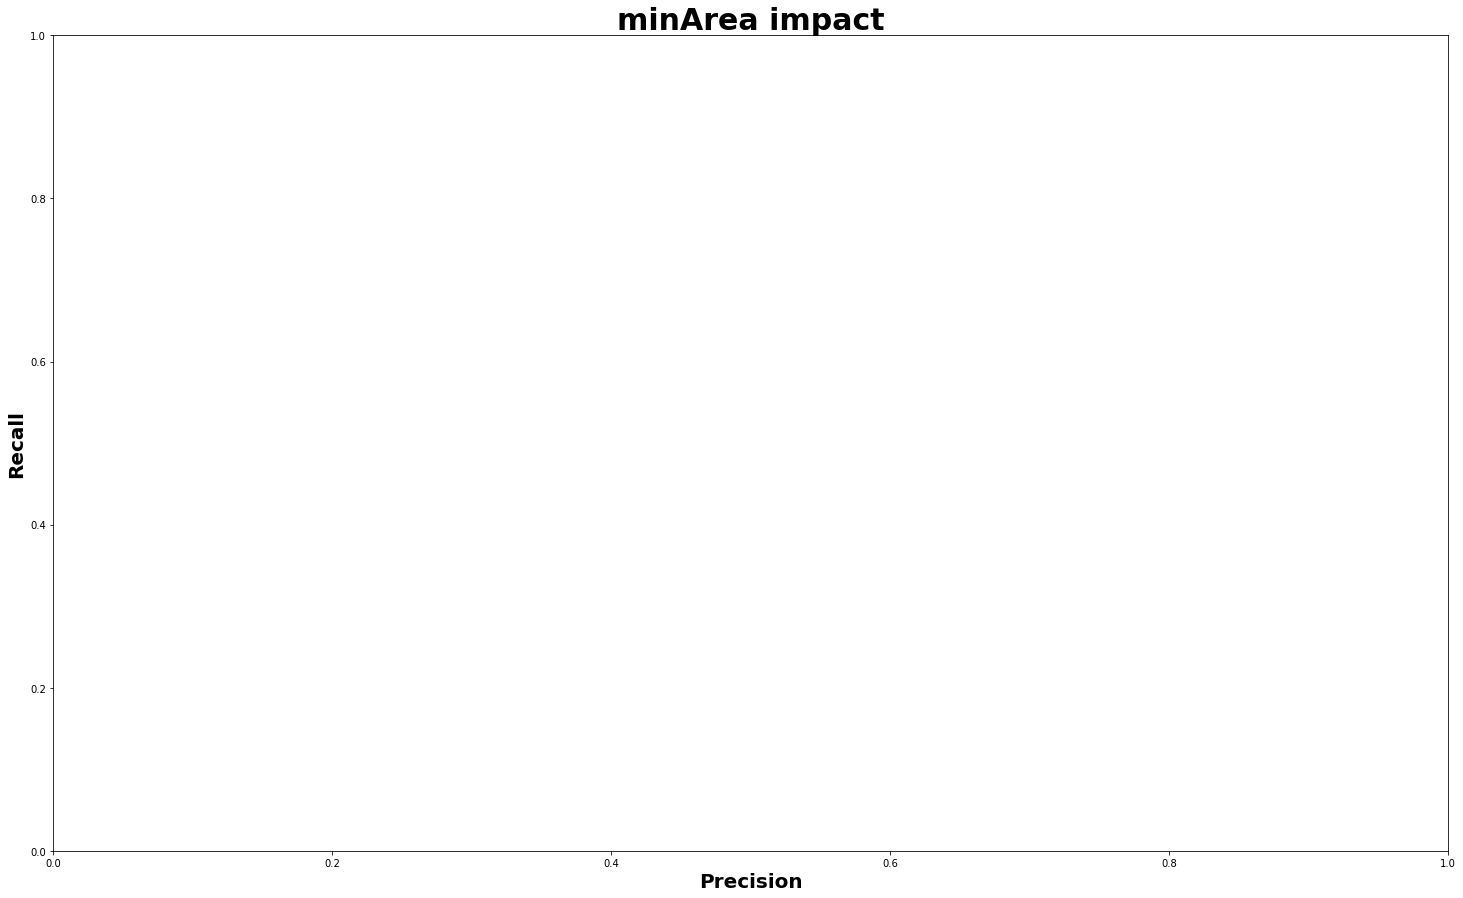

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


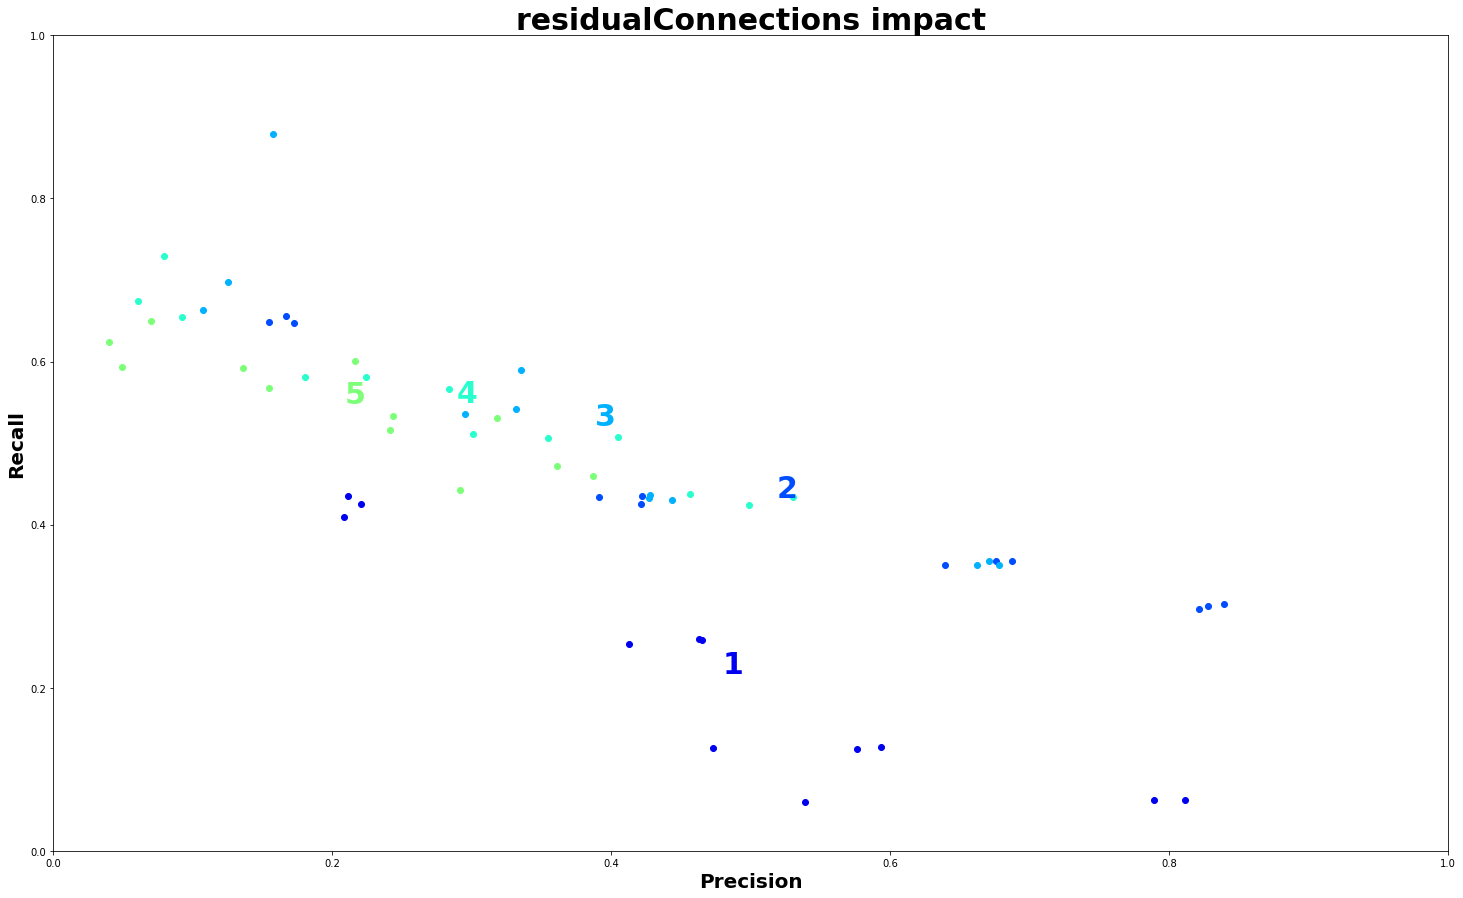

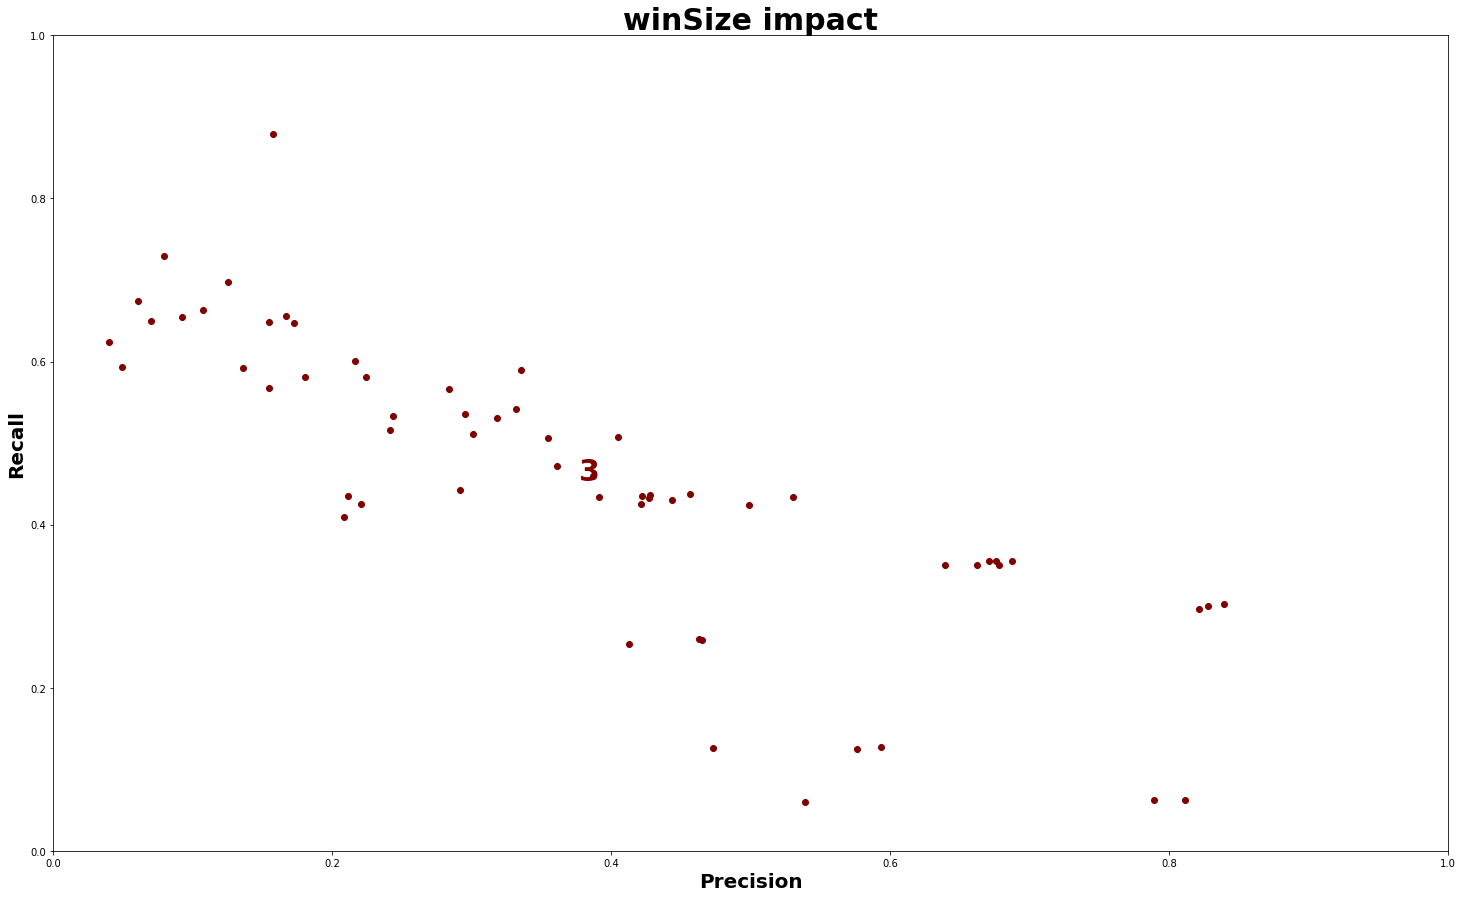

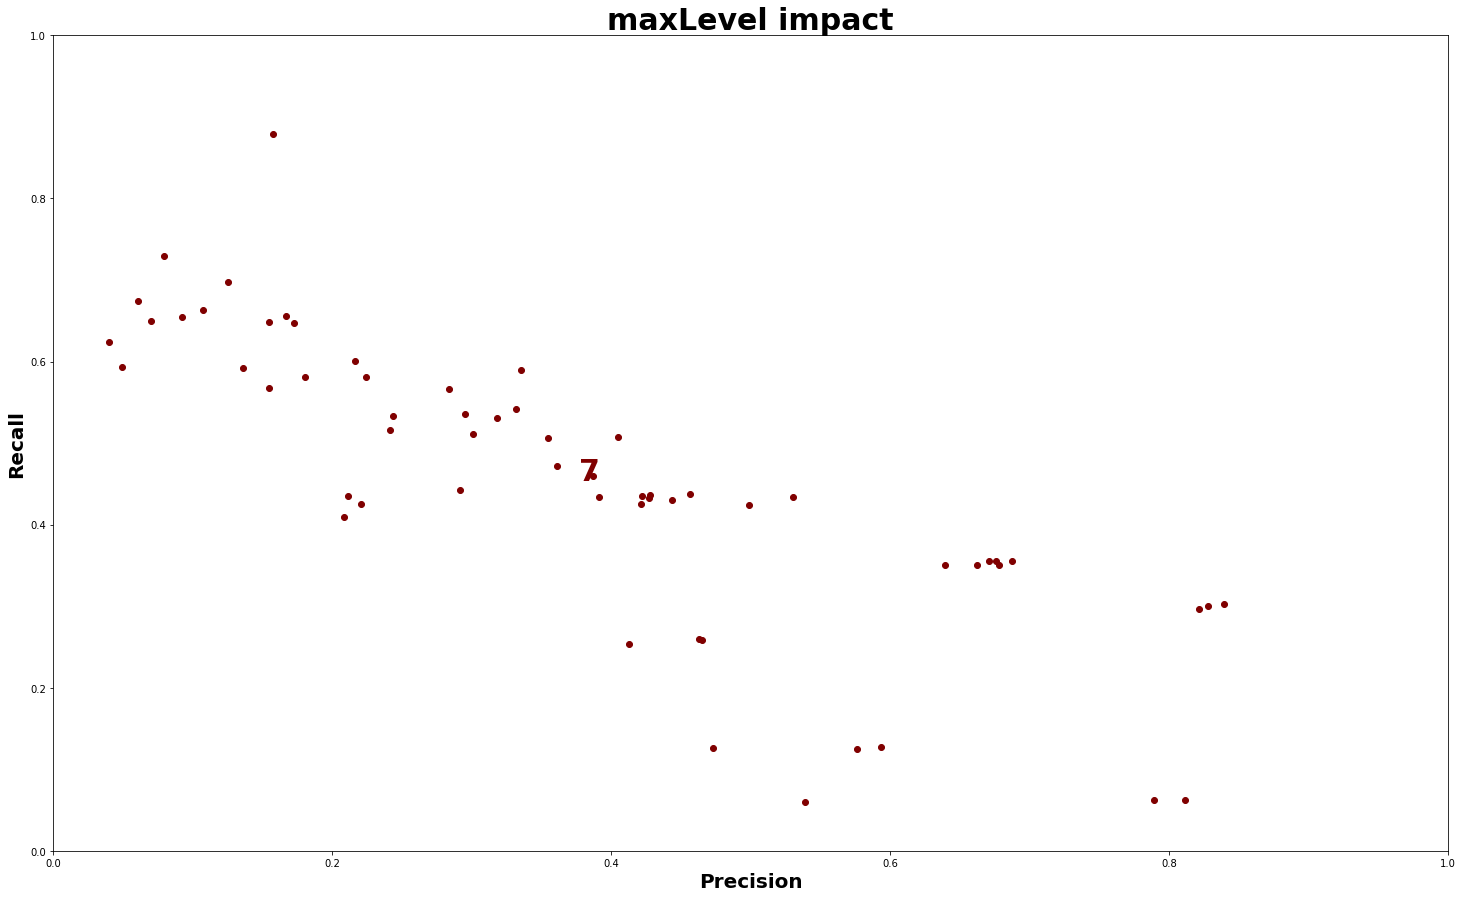

In [51]:
param = ["gaussWindow", "mgp", "minArea", "residualConnections", "winSize", "maxLevel"]
paramRange = [range(3, 10, 2), range(150, 151, 25), range(16, 17), range(1, 11), range(3, 4, 2), range(7, 8, 3)]
for i in range(len(param)):
    plotParam(param[i], paramRange[i])

In [52]:
# Max f1_score
df[df["f1_score"] == max(df["f1_score"])]

,gaussWindow,mgp,minArea,residualConnections,winSize,maxLevel,diffMethod,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
58,11,175,25,4,3,7,0,99.373959,6.643535,0.870709,0.461651,0.530201,0.43377,0.238581


In [53]:
# Max precision
df[df["percentHeliTotalFiltered"] == max(df["percentHeliTotalFiltered"])]

,gaussWindow,mgp,minArea,residualConnections,winSize,maxLevel,diffMethod,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
51,11,150,25,2,3,7,0,97.338935,4.499635,0.544128,0.456601,0.839142,0.302766,0.22249


In [54]:
# Max recall
df[df["percentFrameWithHeli"] == max(df["percentFrameWithHeli"])]

,gaussWindow,mgp,minArea,residualConnections,winSize,maxLevel,diffMethod,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
2,5,125,25,3,3,7,0,117.486316,15.822628,6.486861,1.020438,0.157308,0.879185,0.133434


Text(0, 0.5, 'F1 - score')

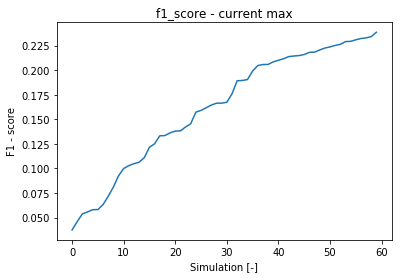

In [55]:
plt.figure()
plt.plot(sorted(df["f1_score"]))
plt.title("f1_score - current max")
plt.xlabel("Simulation [-]")
plt.ylabel("F1 - score")